In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
    
glass = pd.read_csv('glass.14.1.csv')
glass.head(-10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


In [3]:
glass.isnull().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [4]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
glass['RI'] = glass['RI'].fillna(glass['RI'].median())
glass['Na'] = glass['Na'].fillna(glass['Na'].median())
glass['Mg'] = glass['Mg'].fillna(glass['Mg'].median())
glass['Al'] = glass['Al'].fillna(glass['Al'].median())
glass['Si'] = glass['Si'].fillna(glass['Si'].median())
glass['K'] = glass['K'].fillna(glass['K'].median())
glass['Ca'] = glass['Ca'].fillna(glass['Ca'].median())
glass['Ba'] = glass['Ba'].fillna(glass['Ba'].median())
glass['Fe'] = glass['Fe'].fillna(glass['Fe'].median())
glass['Type'] = glass['Type'].fillna(glass['Type'].median())

In [6]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1.517827,13.323103,3.309600,1.378188,72.76021,0.542588,8.676466,0.037497,0.012212,2.167167
std,0.001431,0.379844,0.742066,0.233272,0.36235,0.302238,0.673600,0.240682,0.050734,1.023317
min,1.511150,10.730000,0.000000,0.290000,69.81000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.517680,13.300000,3.480000,1.360000,72.79000,0.555000,8.600000,0.000000,0.000000,2.000000
50%,1.517680,13.300000,3.480000,1.360000,72.79000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.517680,13.300000,3.480000,1.360000,72.79000,0.555000,8.600000,0.000000,0.000000,2.000000
max,1.533930,17.380000,4.490000,3.500000,75.41000,6.210000,16.190000,3.150000,0.510000,7.000000


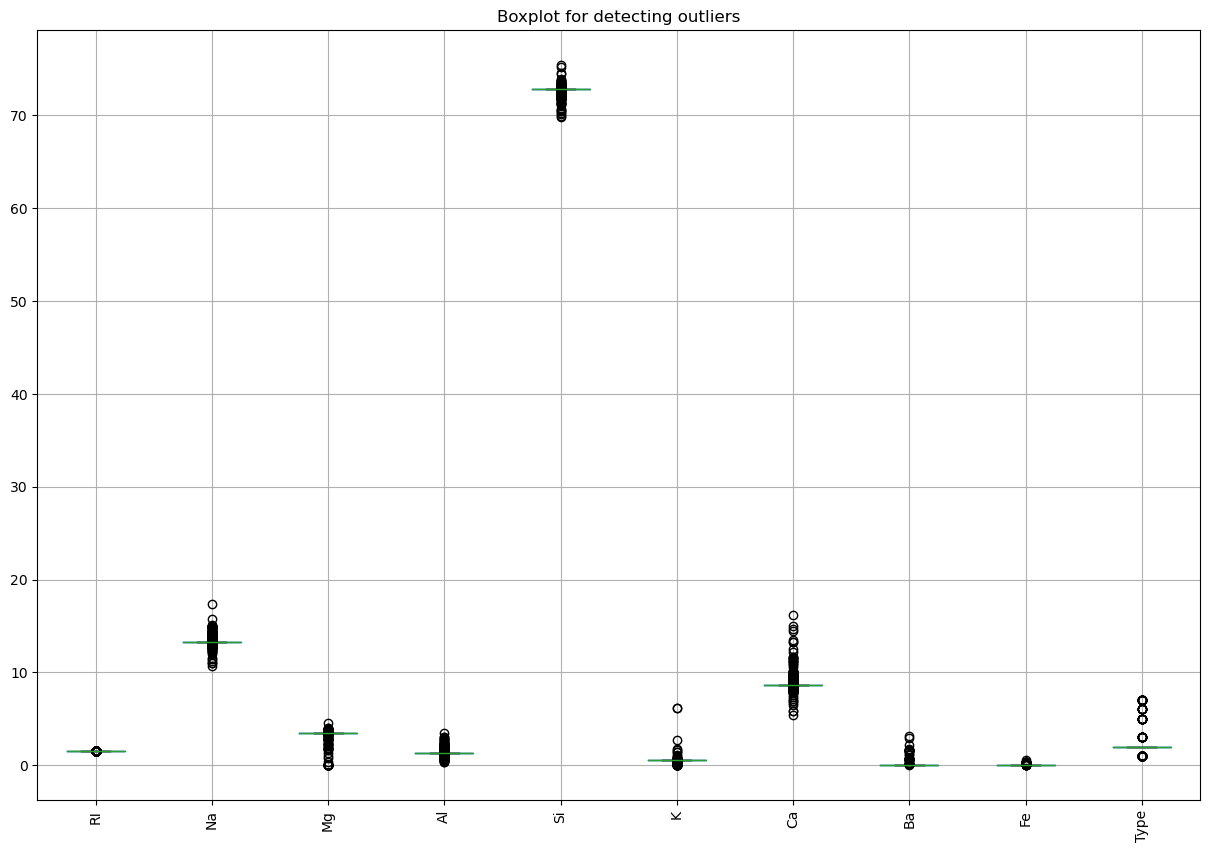


Duplicated rows in the dataset: 785

Data types and unique values in categorical columns (if any):
RI: [1.52101 1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918
 1.51755 1.51571 1.51763 1.51589 1.51748 1.51784 1.52196 1.51911 1.51735
 1.5175  1.51966 1.51736 1.51751 1.5172  1.51764 1.51793 1.51721 1.51768
 1.51747 1.51775 1.51753 1.51783 1.51567 1.51909 1.51797 1.52213 1.51779
 1.5221  1.51786 1.519   1.51869 1.52667 1.52223 1.51898 1.5232  1.51926
 1.51808 1.51837 1.51778 1.51769 1.51215 1.51824 1.51754 1.51905 1.51977
 1.52172 1.52227 1.52099 1.52152 1.523   1.51574 1.51848 1.51593 1.51631
 1.5159  1.51645 1.51627 1.51613 1.51592 1.51646 1.51594 1.51409 1.51625
 1.51569 1.5164  1.51841 1.51605 1.51588 1.51629 1.5186  1.51689 1.51811
 1.51655 1.5173  1.5182  1.52725 1.5241  1.52475 1.53125 1.53393 1.52222
 1.51818 1.52664 1.52739 1.52777 1.51892 1.51847 1.51846 1.51829 1.51708
 1.51673 1.51652 1.51844 1.51663 1.51687 1.51707 1.52177 1.51872 1.51667
 1.52081 1.52068 1.5

In [8]:
# Check for outliers using boxplots
plt.figure(figsize=(15,10))
glass.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot for detecting outliers')
plt.show()

# Check for duplicated rows
print("\nDuplicated rows in the dataset:", glass.duplicated().sum())

# Check for inconsistencies (glass type issues, unexpected values)
print("\nData types and unique values in categorical columns (if any):")
for col in glass.select_dtypes(include=['float64']).columns:
 print(f"{col}: {glass[col].unique()}")

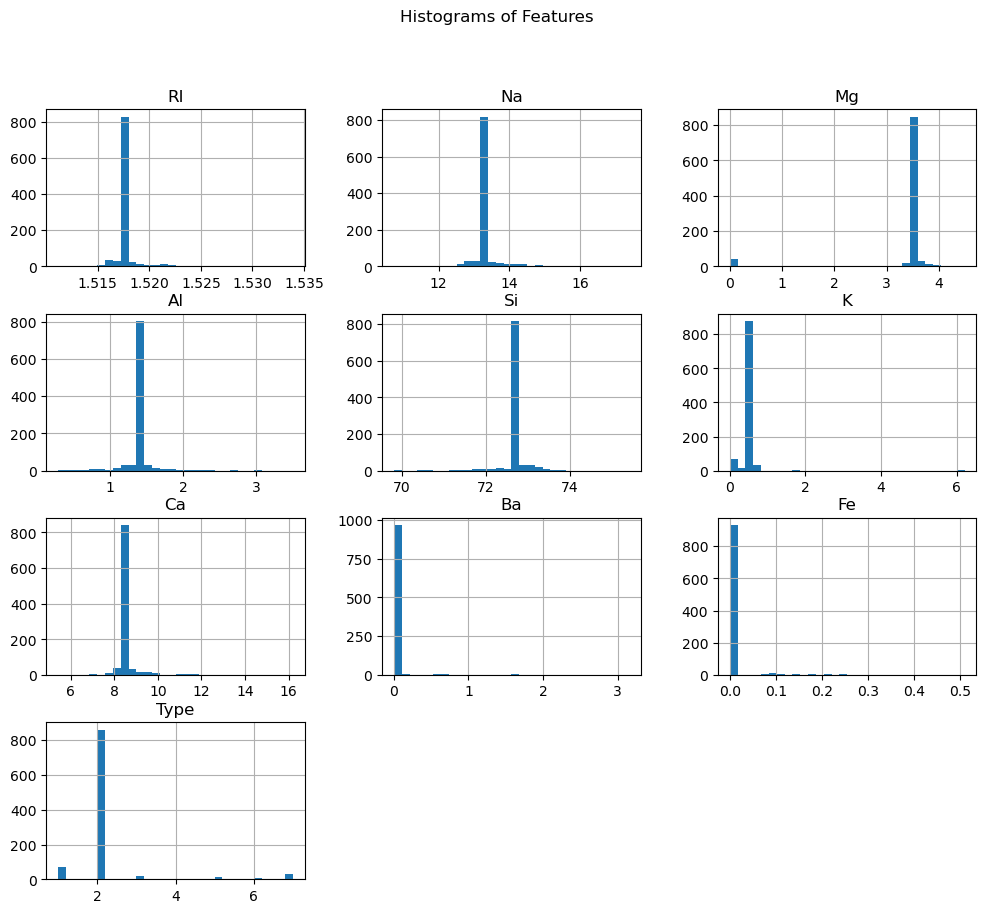

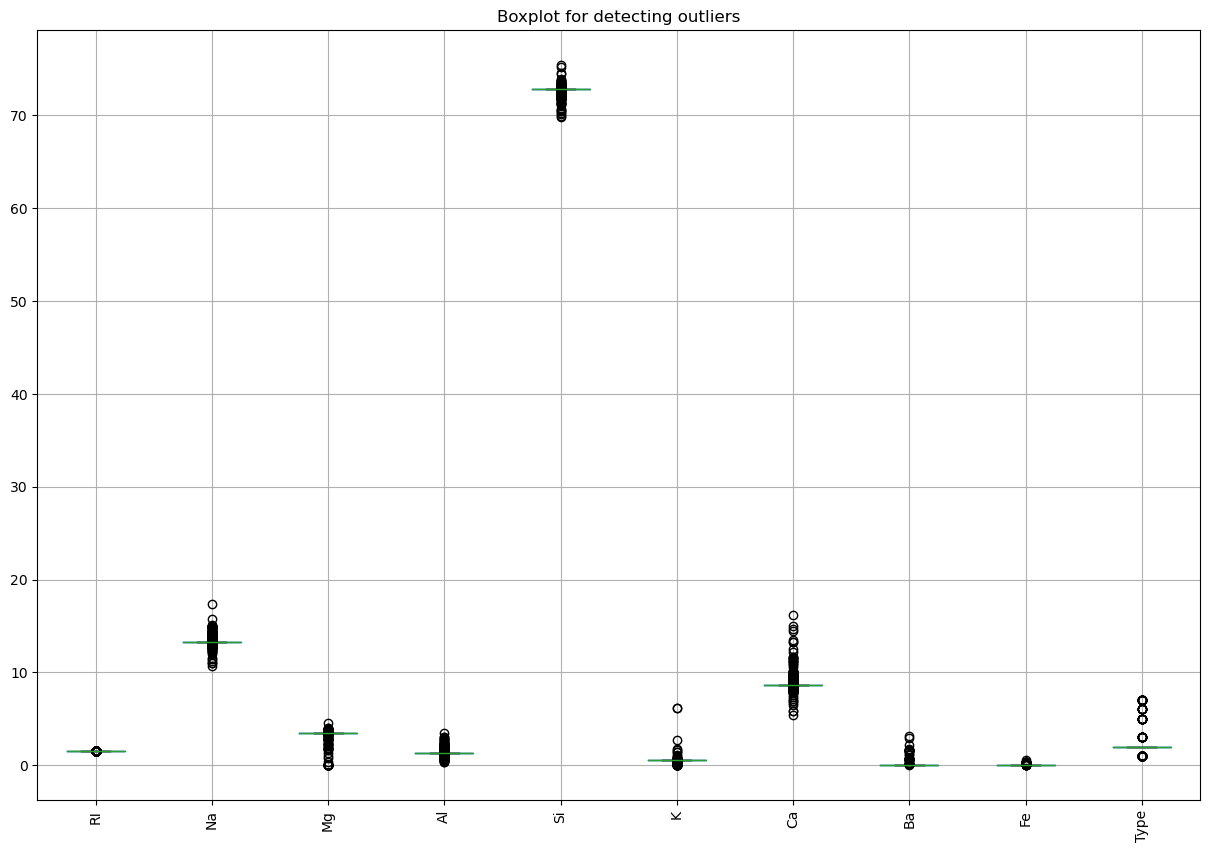

In [9]:
#Histograms for each feature to visualize distributions
glass.hist(figsize=(12, 10), bins=30)
plt.suptitle('Histograms of Features')
plt.show()

#Box plots to visualize potential outliers for each numerical feature
plt.figure(figsize=(15,10))
glass.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot for detecting outliers')
plt.show()


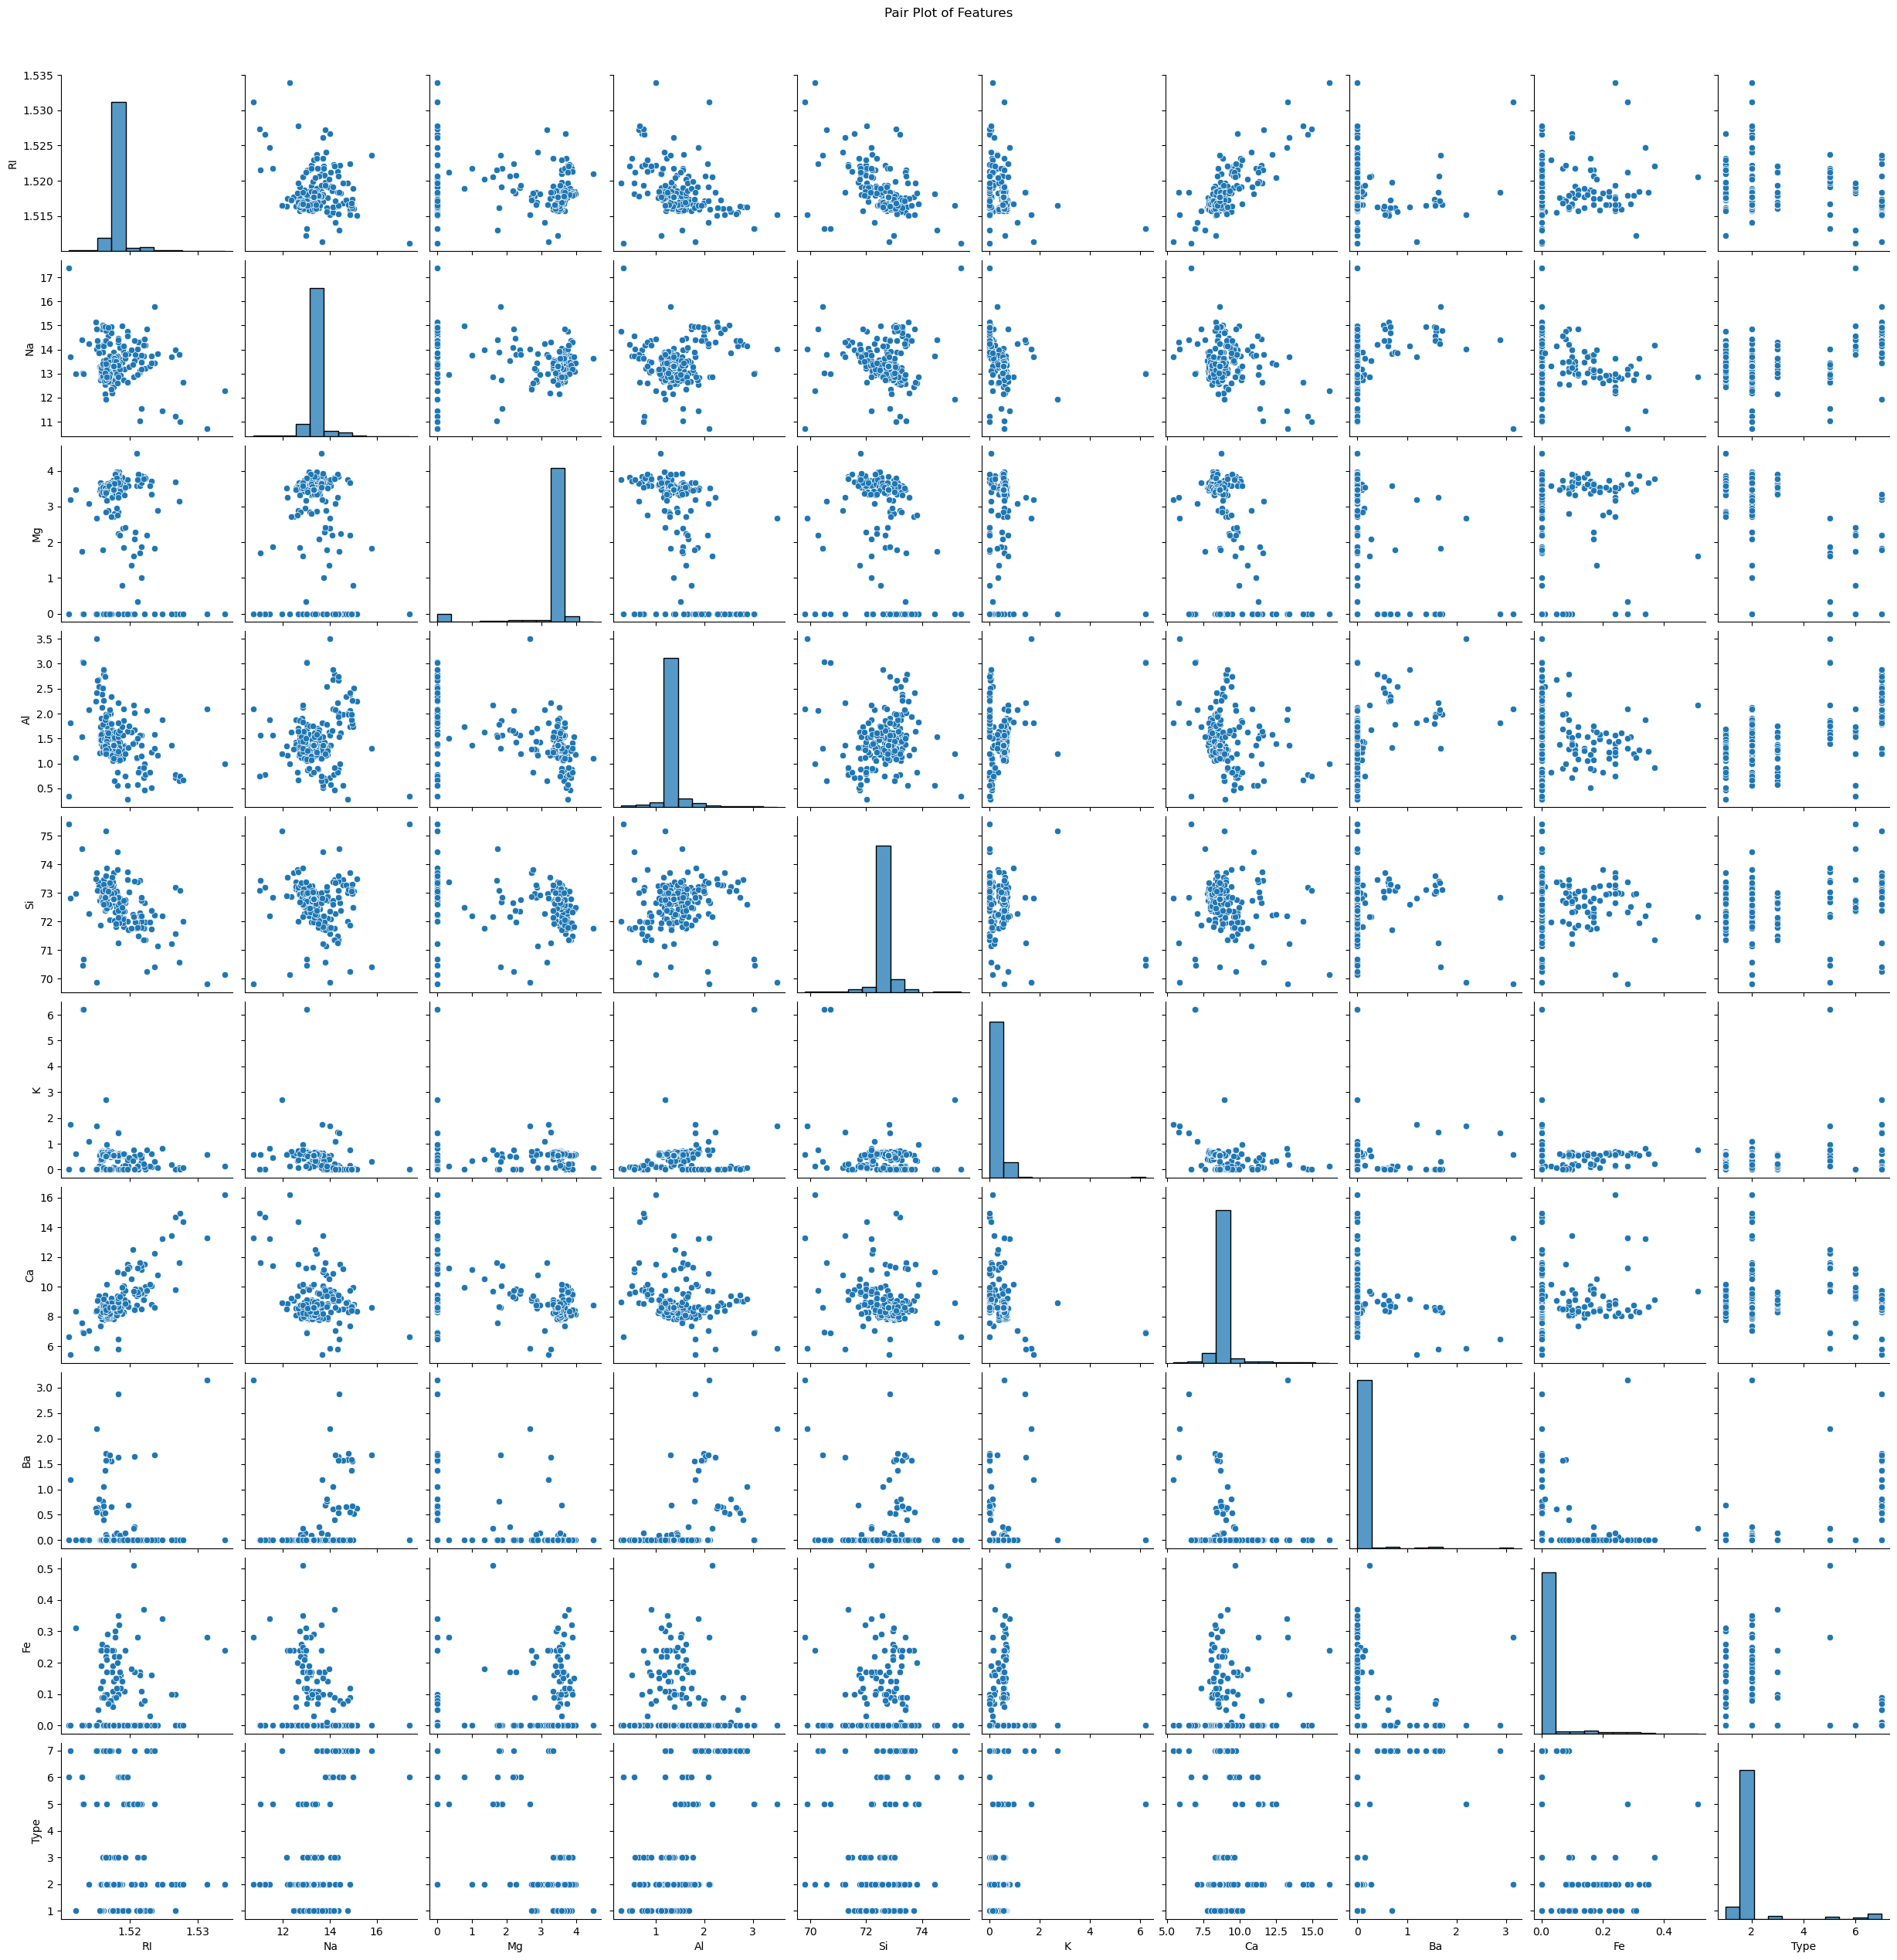

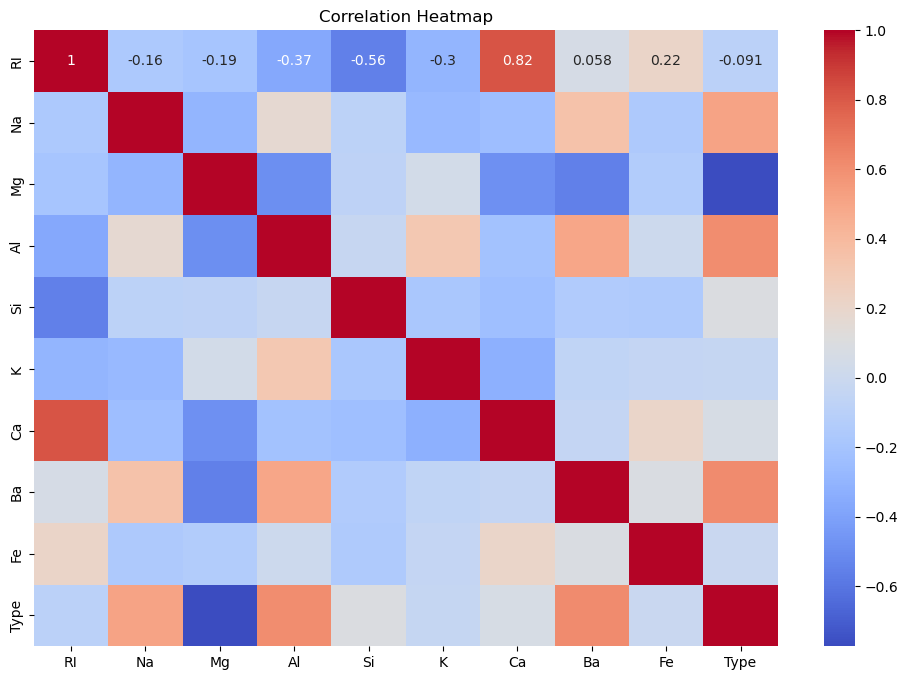

In [10]:
#Pair plot to visualize relationships between features
sns.pairplot(glass)
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

#Correlation heatmap to visualize correlations between features
plt.figure(figsize=(12, 8))
correlation_matrix = glass.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
corr_pairs = correlation_matrix.unstack().sort_values(kind="quicksort").drop_duplicates()
strong_corrs = corr_pairs[(corr_pairs > 0.7) | (corr_pairs < -0.7)]

print("\nStrong correlations (above 0.7 or below -0.7):")
print(strong_corrs)



Strong correlations (above 0.7 or below -0.7):
Type  Mg   -0.773113
RI    Ca    0.818327
      RI    1.000000
dtype: float64


In [12]:
#Data Preprocessing
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [13]:
# Load the dataset
data = glass

# 1. Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print(f"Categorical Columns: {categorical_cols}")

# 2. Apply One-Hot Encoding to the categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the encoded dataset
print("\nEncoded dataset with One-Hot Encoding:")
print(data_encoded.head())


Categorical Columns: Index([], dtype='object')

Encoded dataset with One-Hot Encoding:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1.0


In [14]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features and target variable
X = data[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]  # Replace 'target_column' with your actual target variable
y = data['Type']

# 1. Feature Scaling - Choose either Standardization or Normalization

# Standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Normalization (Optional, choose either Standardization or Normalization)
# scaler = MinMaxScaler()
# X_normalized = scaler.fit_transform(X)

# Handling Imbalanced Data using SMOTE (Oversampling)
print(f"Original class distribution: {Counter(y)}")

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_standardized, y)

# Display the new class distribution after oversampling
print(f"Class distribution after SMOTE: {Counter(y_resampled)}")



                         # Random Forest Model Implementation
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Original class distribution: Counter({2.0: 861, 1.0: 70, 7.0: 29, 3.0: 17, 5.0: 13, 6.0: 9})
Class distribution after SMOTE: Counter({1.0: 861, 2.0: 861, 3.0: 861, 5.0: 861, 6.0: 861, 7.0: 861})
X_train shape: (3616, 9)
X_test shape: (1550, 9)
y_train shape: (3616,)
y_test shape: (1550,)


In [15]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# 2. Fit the model on the training data
rf_model.fit(X_train, y_train)

# 3. Make predictions on the test data
y_pred = rf_model.predict(X_test)

# 4. Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the evaluation results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 99.16%

Classification Report:
              precision    recall  f1-score   support

         1.0       0.97      1.00      0.98       268
         2.0       1.00      0.96      0.98       268
         3.0       0.99      1.00      1.00       244
         5.0       1.00      1.00      1.00       237
         6.0       1.00      1.00      1.00       268
         7.0       1.00      1.00      1.00       265

    accuracy                           0.99      1550
   macro avg       0.99      0.99      0.99      1550
weighted avg       0.99      0.99      0.99      1550


Confusion Matrix:
[[267   0   1   0   0   0]
 [  9 256   1   0   1   1]
 [  0   0 244   0   0   0]
 [  0   0   0 237   0   0]
 [  0   0   0   0 268   0]
 [  0   0   0   0   0 265]]


In [17]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

#  Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')

# Full classification report
classification_rep = classification_report(y_test, y_pred)

# Displaying results
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")

print("\nClassification Report:")
print(classification_rep)


Accuracy: 99.16%
Precision: 99.18%
Recall: 99.16%
F1-Score: 99.16%

Classification Report:
              precision    recall  f1-score   support

         1.0       0.97      1.00      0.98       268
         2.0       1.00      0.96      0.98       268
         3.0       0.99      1.00      1.00       244
         5.0       1.00      1.00      1.00       237
         6.0       1.00      1.00      1.00       268
         7.0       1.00      1.00      1.00       265

    accuracy                           0.99      1550
   macro avg       0.99      0.99      0.99      1550
weighted avg       0.99      0.99      0.99      1550



In [19]:
                                #Bagging and Boosting Methods
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings('ignore')

# Initialize the Bagging Classifier with Random Forest as the base estimator
bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42), n_estimators=50, random_state=42)

# Train the Bagging model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate performance
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

print(f"Bagging - Accuracy: {accuracy_bagging * 100:.2f}%")
print(f"Bagging - Precision: {precision_bagging * 100:.2f}%")
print(f"Bagging - Recall: {recall_bagging * 100:.2f}%")
print(f"Bagging - F1-Score: {f1_bagging * 100:.2f}%\n")


Bagging - Accuracy: 98.65%
Bagging - Precision: 98.69%
Bagging - Recall: 98.65%
Bagging - F1-Score: 98.64%

